In [2]:
#run this exactly once
# try:
#     from pip import main as pipmain
# except ImportError:
#     from pip._internal import main as pipmain
    
# pipmain(['install', 'seaborn'])

# Real Practical Analysis

Now that we learned how to do it manually. Let us explore how to do with a more complete tools

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [91]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
#plt.style.use('fivethirtyeight')

    A retrospective sample of males in a heart-disease high-risk region
    of the Western Cape, South Africa. There are roughly two controls per
    case of CHD. Many of the CHD positive men have undergone blood
    pressure reduction treatment and other programs to reduce their risk
    factors after their CHD event. In some cases the measurements were
    made after these treatments. These data are taken from a larger
    dataset, described in  Rousseauw et al, 1983, South African Medical
    Journal.

    sbp		systolic blood pressure
    tobacco		cumulative tobacco (kg)
    ldl		low densiity lipoprotein cholesterol
    adiposity
    famhist		family history of heart disease (Present, Absent)
    typea		type-A behavior
    obesity
    alcohol		current alcohol consumption
    age		age at onset
    chd		response, coronary heart disease

In [4]:
df = pd.read_csv('SAheart.data.txt')
df.famhist = df.famhist.map({'Present': 1.0, 'Absent': 0.0}).astype(float)
df = df.astype(float)
df.pop('row.names')
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160.0,12.00,5.73,23.11,1.0,49.0,25.30,97.20,52.0,1.0
1,144.0,0.01,4.41,28.61,0.0,55.0,28.87,2.06,63.0,1.0
2,118.0,0.08,3.48,32.28,1.0,52.0,29.14,3.81,46.0,0.0
3,170.0,7.50,6.41,38.03,1.0,51.0,31.99,24.26,58.0,1.0
4,134.0,13.60,3.50,27.78,1.0,60.0,25.99,57.34,49.0,1.0


Let's visualize
Ready made package is good for quick look but to really inpsect deeply do it manually is the best.

You can see that none of the 2d pic really helps.

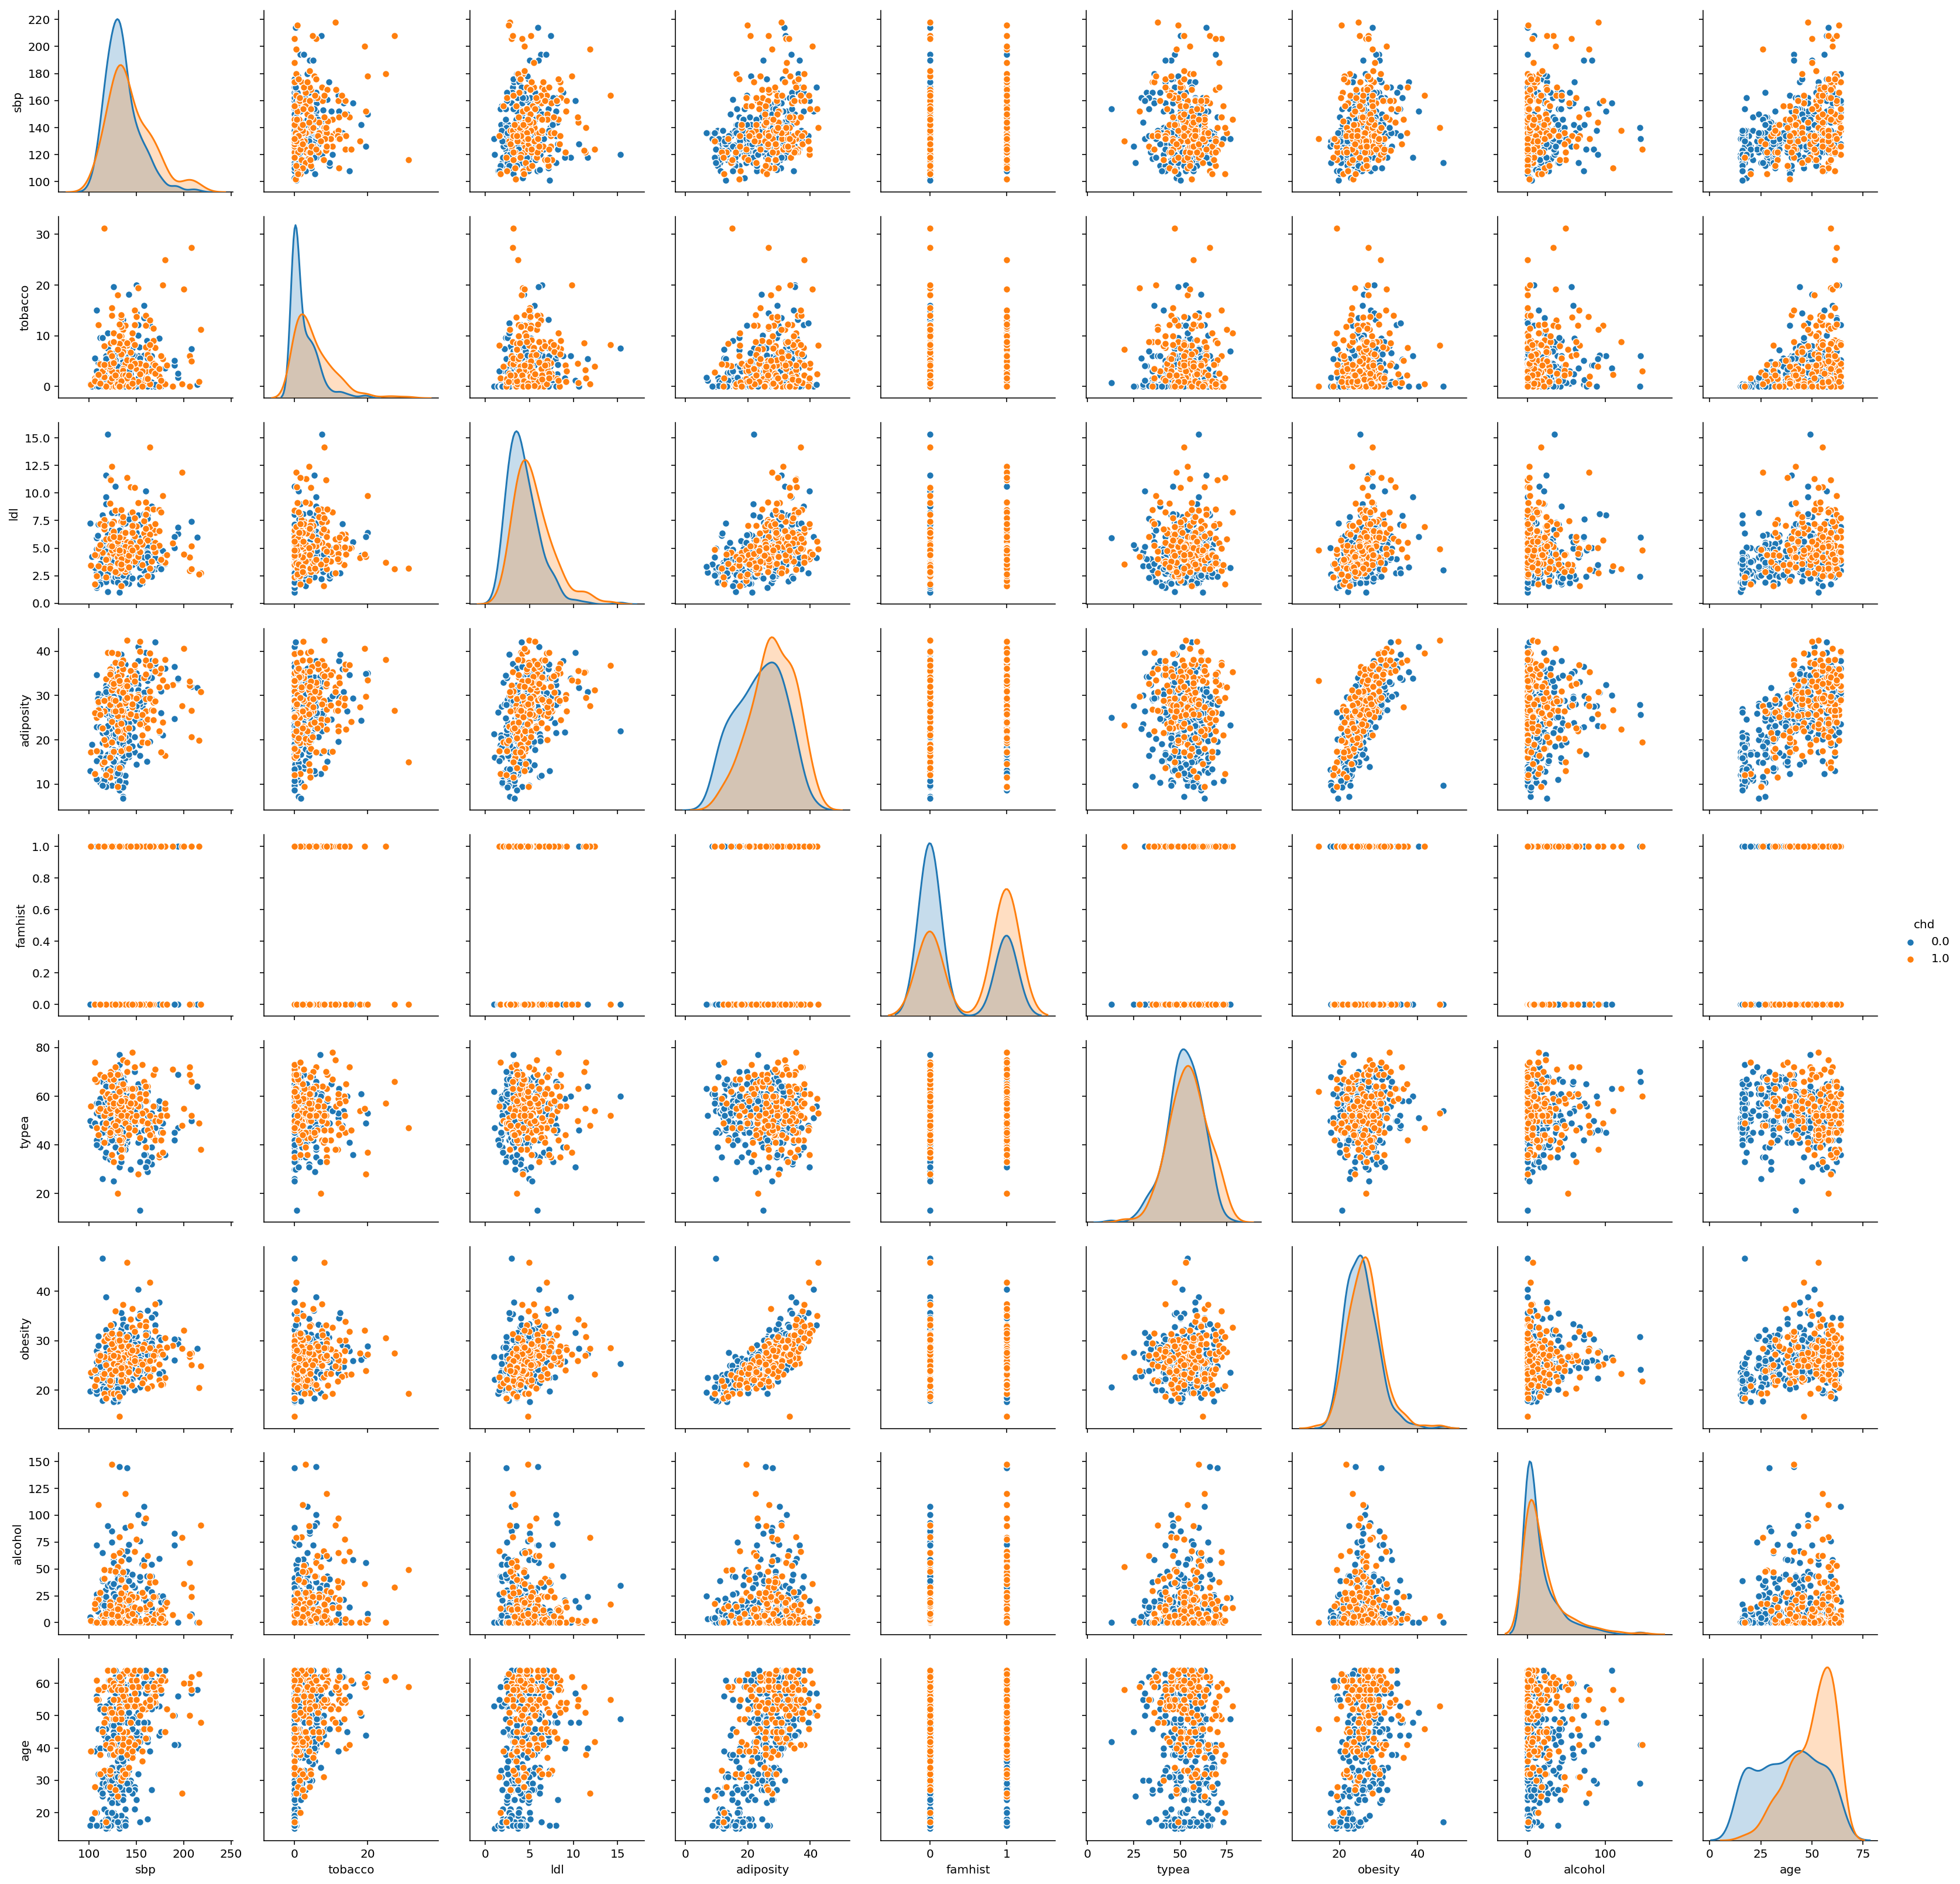

In [5]:
cols = df.columns.tolist()
cols.remove('chd')
sns.pairplot(df, hue='chd', vars=cols ,diag_kind='kde')

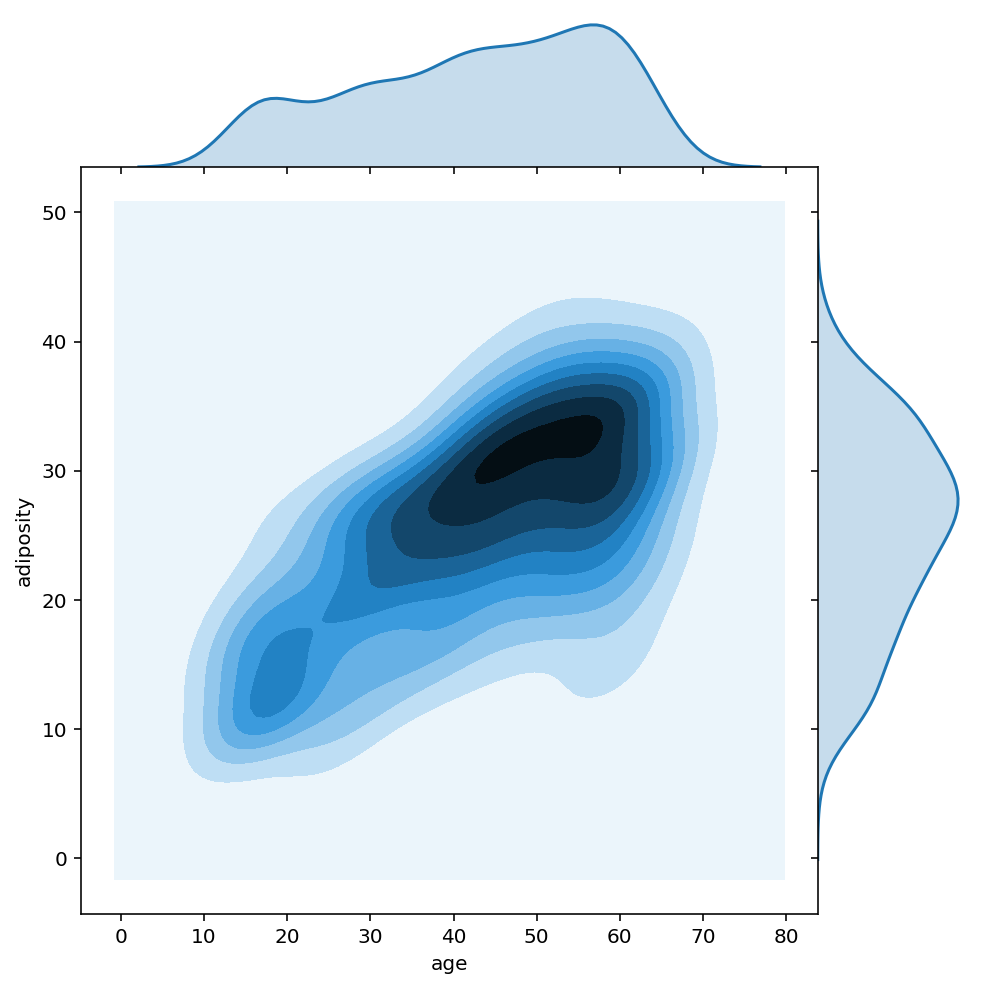

In [6]:
sns.jointplot(df.age, df.adiposity, height=7, kind='kde', space=0)

Build a logistic classifier and fit

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [8]:
#build and fit logistic classifier
train_df, test_df = train_test_split(df, test_size=0.2)

class_col = 'chd'
feature_cols = df.columns.tolist()
feature_cols.remove(class_col)
print(feature_cols)
train_xs = train_df[feature_cols]
train_ys = train_df[class_col]
test_xs = test_df[feature_cols]
test_ys = test_df[class_col]
print(len(train_xs), len(test_xs))

['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']
369 93


In [9]:
lc = LogisticRegression()
lc.fit(train_xs, train_ys)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

We can count the number that we get correctly if we cut at 0.5 but that doesnt' tell the whole picture.

In [10]:

np.sum(lc.predict(train_xs) == train_ys)

269

Get the probabilities

In [11]:
score = lc.predict_proba(train_xs)[:,1]
#print(score)

# ROC Curve
Plot the ROC curve (There is a whole family of this kind of curve) All you need to know is which corner is a good one.

The Plot is done by varying the threshold value. Each one will give you true positive rate and false positive rate.

ROC Curve is a curve is obtained by plotting FPR on the x axis and TPR on the y axis. (Which corner is a good one?)


In [12]:
fpr, tpr, thres = sk.metrics.roc_curve(train_ys, score)
sk.metrics.roc_auc_score(train_ys, score)

0.7854522046990665

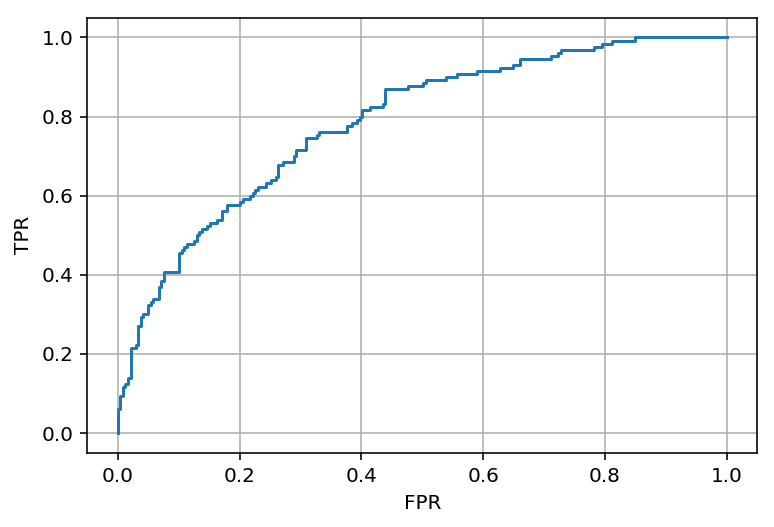

In [13]:
def roc(fpr, tpr, label=''):
    plt.plot(fpr, tpr, label=label)
    plt.grid()
    plt.xlabel('FPR')
    plt.ylabel('TPR')
roc(fpr, tpr)
linear_fpr, linear_tpr = fpr, tpr

# Higher Dimension

We have learned that we can get a more complicated boundaries by going to higher dimension.

In [14]:
#polynomial data
lr = LogisticRegression(C=5000)

poly = sk.preprocessing.PolynomialFeatures(2)
poly_xs = poly.fit_transform(train_xs.values)

In [15]:
lr.fit(poly.fit_transform(train_xs.values), train_ys)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=5000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
score = lr.predict_proba(poly.fit_transform(train_xs))

In [17]:
fpr, tpr, thres = sk.metrics.roc_curve(train_ys, score[:,1])

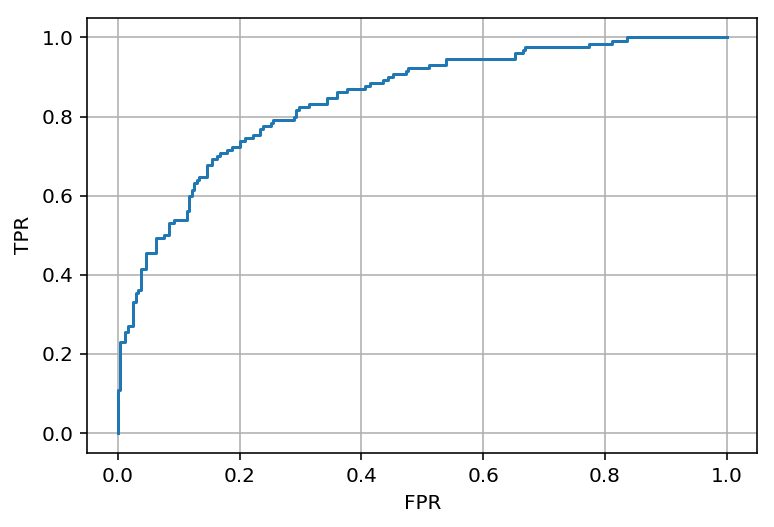

In [18]:
roc(fpr, tpr)
poly_fpr, poly_tpr = fpr, tpr

## Which one is better?

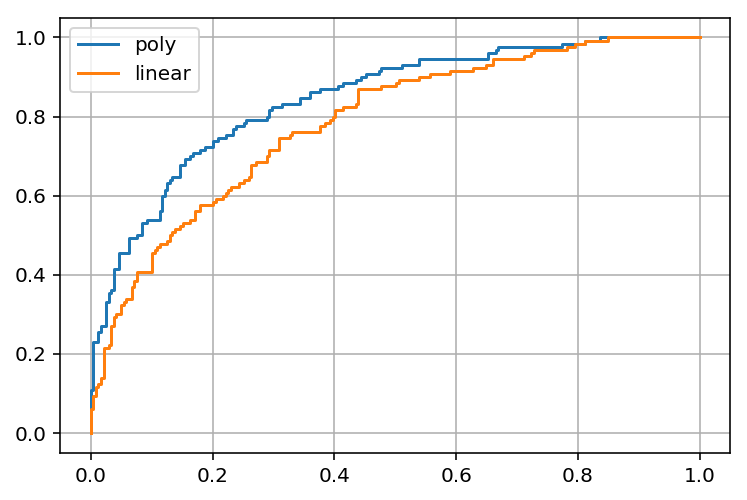

In [19]:
plt.plot(fpr, tpr, label='poly')
plt.plot(linear_fpr, linear_tpr, label='linear')
plt.grid()
plt.legend()

One popular metric is the are under the curve (AUC-ROC)

In [20]:
print('linear', sk.metrics.auc(linear_fpr, linear_tpr))
print('poly', sk.metrics.auc(poly_fpr, poly_tpr))

linear 0.7854522046990665
poly 0.8452848406823302


Does this **really** mean one is better than another? Keep this in mind

# Pipeline
We want to do this on the test as well.
You can see that there is a lot of duplication in the code. Introducing pipeline.

In [21]:
import sklearn.pipeline
LogisticRegression()
linear_pipe = sk.pipeline.Pipeline([
    ('logistic', LogisticRegression())
])
poly_pipe = sk.pipeline.Pipeline([
    ('poly_transform', sk.preprocessing.PolynomialFeatures(2)),
    ('logistic', LogisticRegression(C=5000))
])

In [22]:
linear_pipe.fit(train_xs, train_ys)
poly_pipe.fit(train_xs, train_ys)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('poly_transform', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('logistic', LogisticRegression(C=5000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [23]:
#now we are ready to clasify
linear_prob_test = linear_pipe.predict_proba(test_xs)[:,1]
poly_prob_test = poly_pipe.predict_proba(test_xs)[:,1]

# How does it perform on test data

In [24]:
def roc(true_ys, guess_ys, label='', **kwd):
    fpr, tpr, thres = sklearn.metrics.roc_curve(true_ys, guess_ys)
    plt.plot(fpr, tpr, label=label, **kwd)

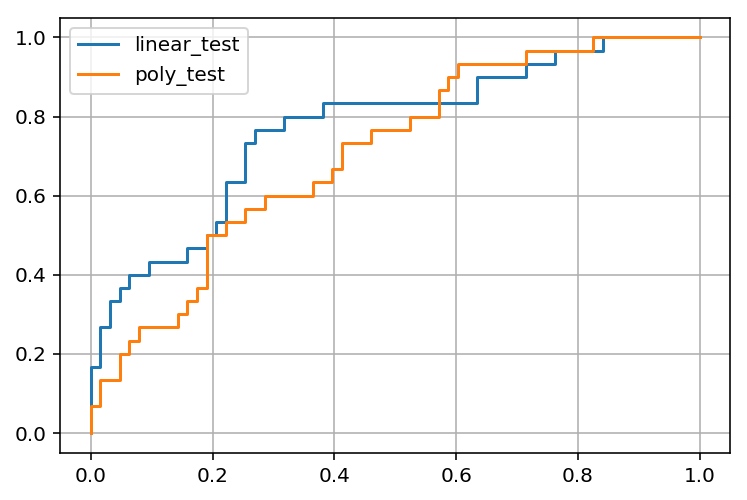

In [25]:
roc(test_ys, linear_prob_test, 'linear_test')
roc(test_ys, poly_prob_test, 'poly_test')
plt.grid()
plt.legend()

Now you can see the performance gain we thought we had is gone. The phenomena is called **overfitting**. The intuition is overadvertise. We claim one performance but if someone were to use it they will see different performance.

The idea here is that polynomial logistic regression is inherently a more complicated model. This means that the search space for is larger than the linear logistic one. This generalize to a more other model as well.

Once the search space is large enough to start being able cheat on the pattern that only exists in the training data.

An analogy would be a student trying to do well on the exam. If the student try to just memorize the old exam, he would do really well on the exam but when the student would perform terribly on the actual exam. While the other one try to learn the patter that co-exists in both train and test, the actual underlying material, then that student would perform well on both of them.

### Let us compare train and test performance

In [26]:
linear_prob_train = linear_pipe.predict_proba(train_xs)[:,1]
poly_prob_train = poly_pipe.predict_proba(train_xs)[:,1]

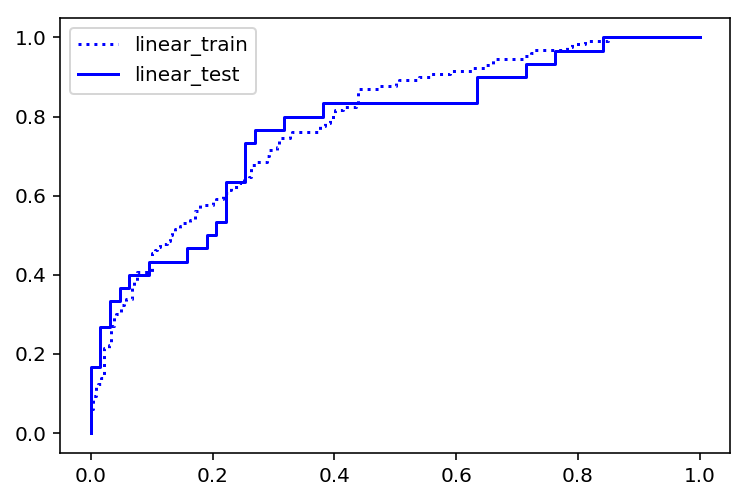

In [27]:
roc(train_ys, linear_prob_train, 'linear_train', linestyle=':', color='b')
roc(test_ys, linear_prob_test, 'linear_test', linestyle='-', color='b')
plt.legend()

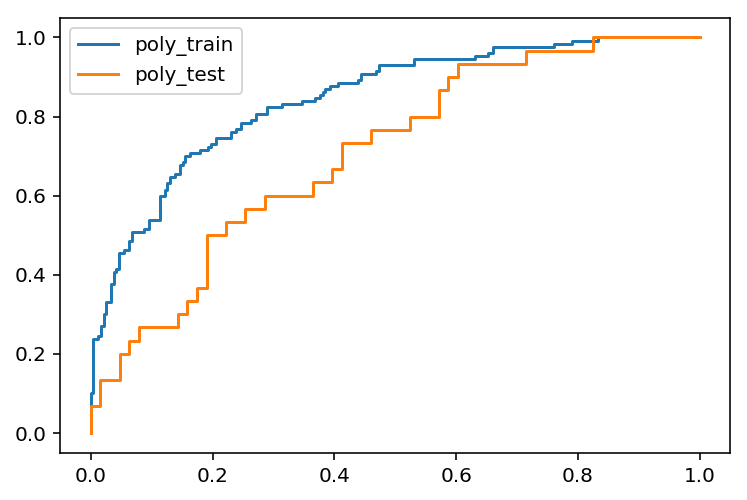

In [28]:
roc(train_ys, poly_prob_train, 'poly_train')
roc(test_ys, poly_prob_test, 'poly_test')
plt.legend()

# Regularization

Now we notice that there are two things we need to balance: the complexity of the model and accuracy of the model. So, in training the model we need to modify the cost function a bit.

$
cost(w) = C \times \text{Accuracy} + \text{Complexity}
$

where $C$ is the number that indicate how much we are about accuracy vs complexity. The larger $C$ the more we care about Accuracy thus less about complexity(less regularization). While the smaller $C$ means we care more about complexity thus more regularization. (Note that some library put $C$ infront of complexity so the meaning is switched)

The technique of penalizing the model by complexity to get a simpler model while sacrificing the accuracy is called **regularization**.

The question now is How do we define complexity? For model that involve $\vec{w}\cdot\vec{x}$ it's pretty easy. The complexity comes from all $\vec{w}$ except $w_0$. To convince you, recall that the bounary line is defined by $\vec{w}\cdot\vec{x} = \text{constant}$. The $w_0$ acts as a shift while the other $w$ makes the line curves. So the complexity is proportional to $w_i$ where $i>0$.

There are two popular way to regularize it. 

- $L_2$ regularization $\text{Complexity} = \sum_{i=1}^n w_i^2$
- $L_1$ regularization $\text{Complexity} = \sum_{i=1}^n |w_i|$
- There is also a hybrid called "huber loss". Wikipedia is your friend. But you can come up with other as long as it scales with $\vec{w}$

You may notice one thing about *C=5000*. Now you know what it means.

In [81]:
reg_poly_pipeline = sk.pipeline.Pipeline([
    ('poly_transform', sk.preprocessing.PolynomialFeatures(2)),
    ('logistic', LogisticRegression(C=1e-5))
])

reg_poly_pipeline.fit(train_xs, train_ys)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('poly_transform', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('logistic', LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [82]:
sty = {
    'linear_train': {'color':'b', 'linestyle':'--'},
    'linear_test': {'color':'b', 'linestyle':'-'},
    'poly_train': {'color':'r', 'linestyle':'--'},
    'poly_test': {'color':'r', 'linestyle':'-'},
    'reg_poly_train' : {'color': 'orange', 'linestyle':'--'},
    'reg_poly_test' : {'color': 'orange', 'linestyle':'-'}
}

In [83]:
reg_poly_prob_train = reg_poly_pipeline.predict_proba(train_xs)[:,1]
reg_poly_prob_test = reg_poly_pipeline.predict_proba(test_xs)[:,1]

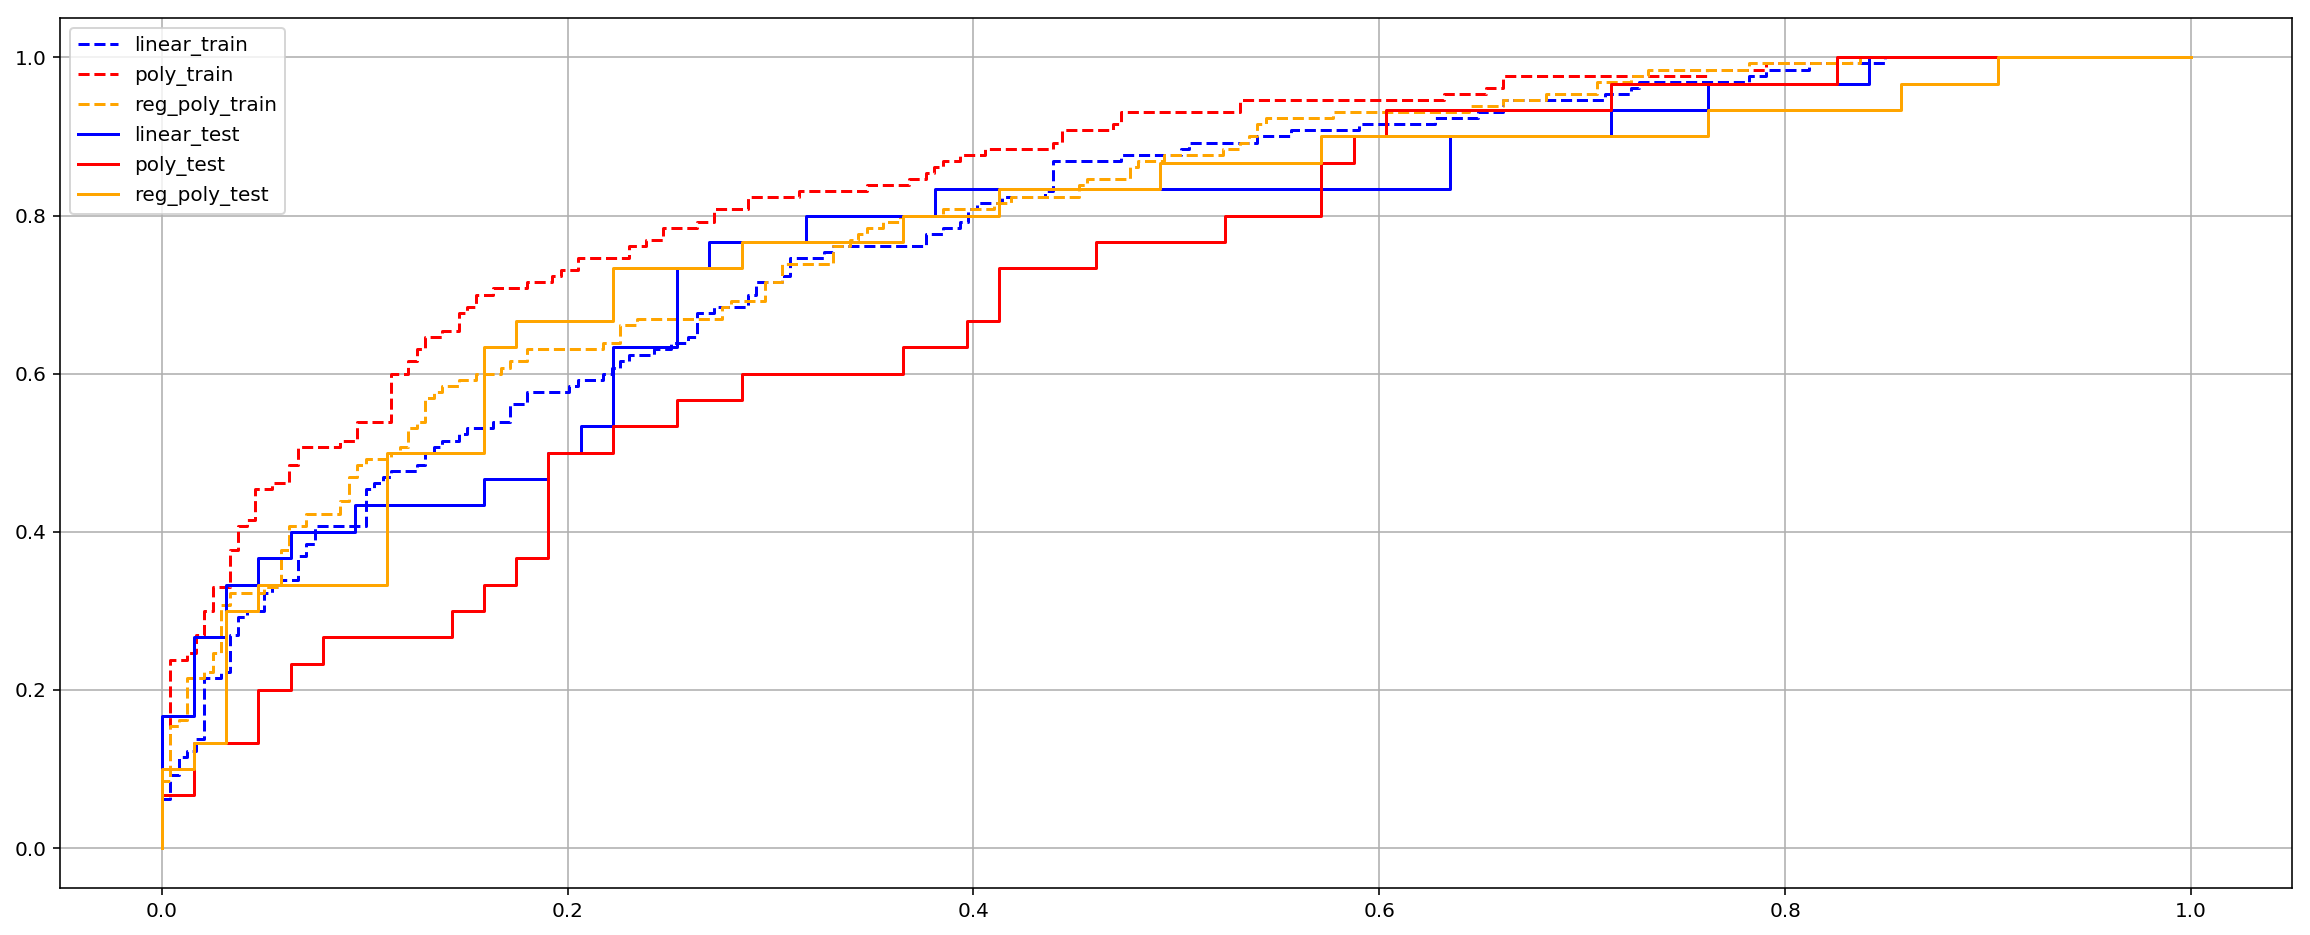

In [84]:
plt.figure(figsize=(20,8))
roc(train_ys, linear_prob_train, 'linear_train', **sty['linear_train'])
roc(train_ys, poly_prob_train, 'poly_train', **sty['poly_train'])
roc(train_ys, reg_poly_prob_train, 'reg_poly_train', **sty['reg_poly_train'])

roc(test_ys, linear_prob_test, 'linear_test', **sty['linear_test'])
roc(test_ys, poly_prob_test, 'poly_test', **sty['poly_test'])
roc(test_ys, reg_poly_prob_test, 'reg_poly_test', **sty['reg_poly_test'])
plt.legend()
plt.grid()

## Model selection and Cross Validation

The question is now which which $C$ should you use. 

Or in a more general, if we have many competing models, which could come from different algorithm or different set of parameter(ex: $C$), how do we select the **best** model. 

The first thought would be to just look at all the models and select the one with highest score from the test set (AUC, F1 or whatever).

But, the problem is a bit more complicated. Typically we build a model, we want to report the performance as well. But if we were to report this from the test set that we use to select the best model. We kind of cheat and more susceptible to noise from test/train sampling.

### Cross Validation

To make sure that the noise from test/train sampling has no effect on us, easiest thing we can do is to sampling it again and again and test exactly the same parater over and over to see the mean the the std.

This technique is called crossvalidation. There are many way to make many set of test/train data(look up wiki). But most of the time randomize would just do.


In [117]:
from scipy import interp


def random_cv(process, n=20):
    rocs = []
    for i in range(20):
        cl = sk.pipeline.Pipeline(process)
        train_xs, test_xs, train_ys, test_ys = train_test_split(df[feature_cols], df[class_col], test_size=0.2)
        cl.fit(train_xs, train_ys)
        score = cl.predict_proba(test_xs)[:,1]
        fpr, tpr, thres = sklearn.metrics.roc_curve(test_ys, score)
        rocs.append((fpr, tpr))
    return mean_curves(rocs)


In [118]:
from scipy import interp
def mean_curves(curves, n = 100):
    #curves = [(xs,ys), (xs,ys)]
    #return mean y for xs, std y for xs
    xss = [x[0] for x in curves]
    minx, maxx = min([min(xs) for xs in xss]), max([max(xs) for xs in xss])
    mean_xs = np.linspace(minx, maxx, n)
    eyss = []
    for xs, ys in curves:
        eys = []
        for x in mean_xs:
            ey = interp(x, xs, ys)
            eys.append(ey)
        eyss.append(eys)
    eyss = np.array(eyss)
    mean_ys = np.mean(eyss, axis=0)
    std_ys = np.std(eyss, axis=0)
    return mean_xs, mean_ys, std_ys

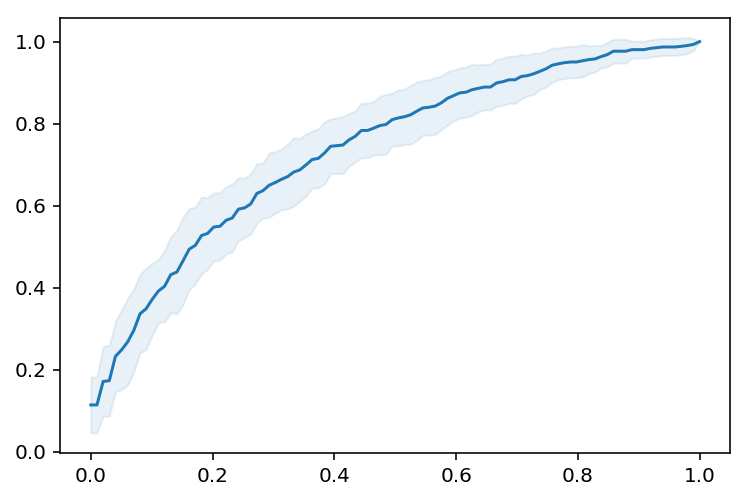

In [119]:
process = [
            ('poly_transform', sk.preprocessing.PolynomialFeatures(2)),
            ('logistic', LogisticRegression(C=1e-5))
        ]
mxs, mys, stdys = random_cv(process)
l = plt.plot(mxs, mys)
plt.fill_between(mxs, mys-stdys, mys+stdys, alpha=0.1, color=l[0].get_color())

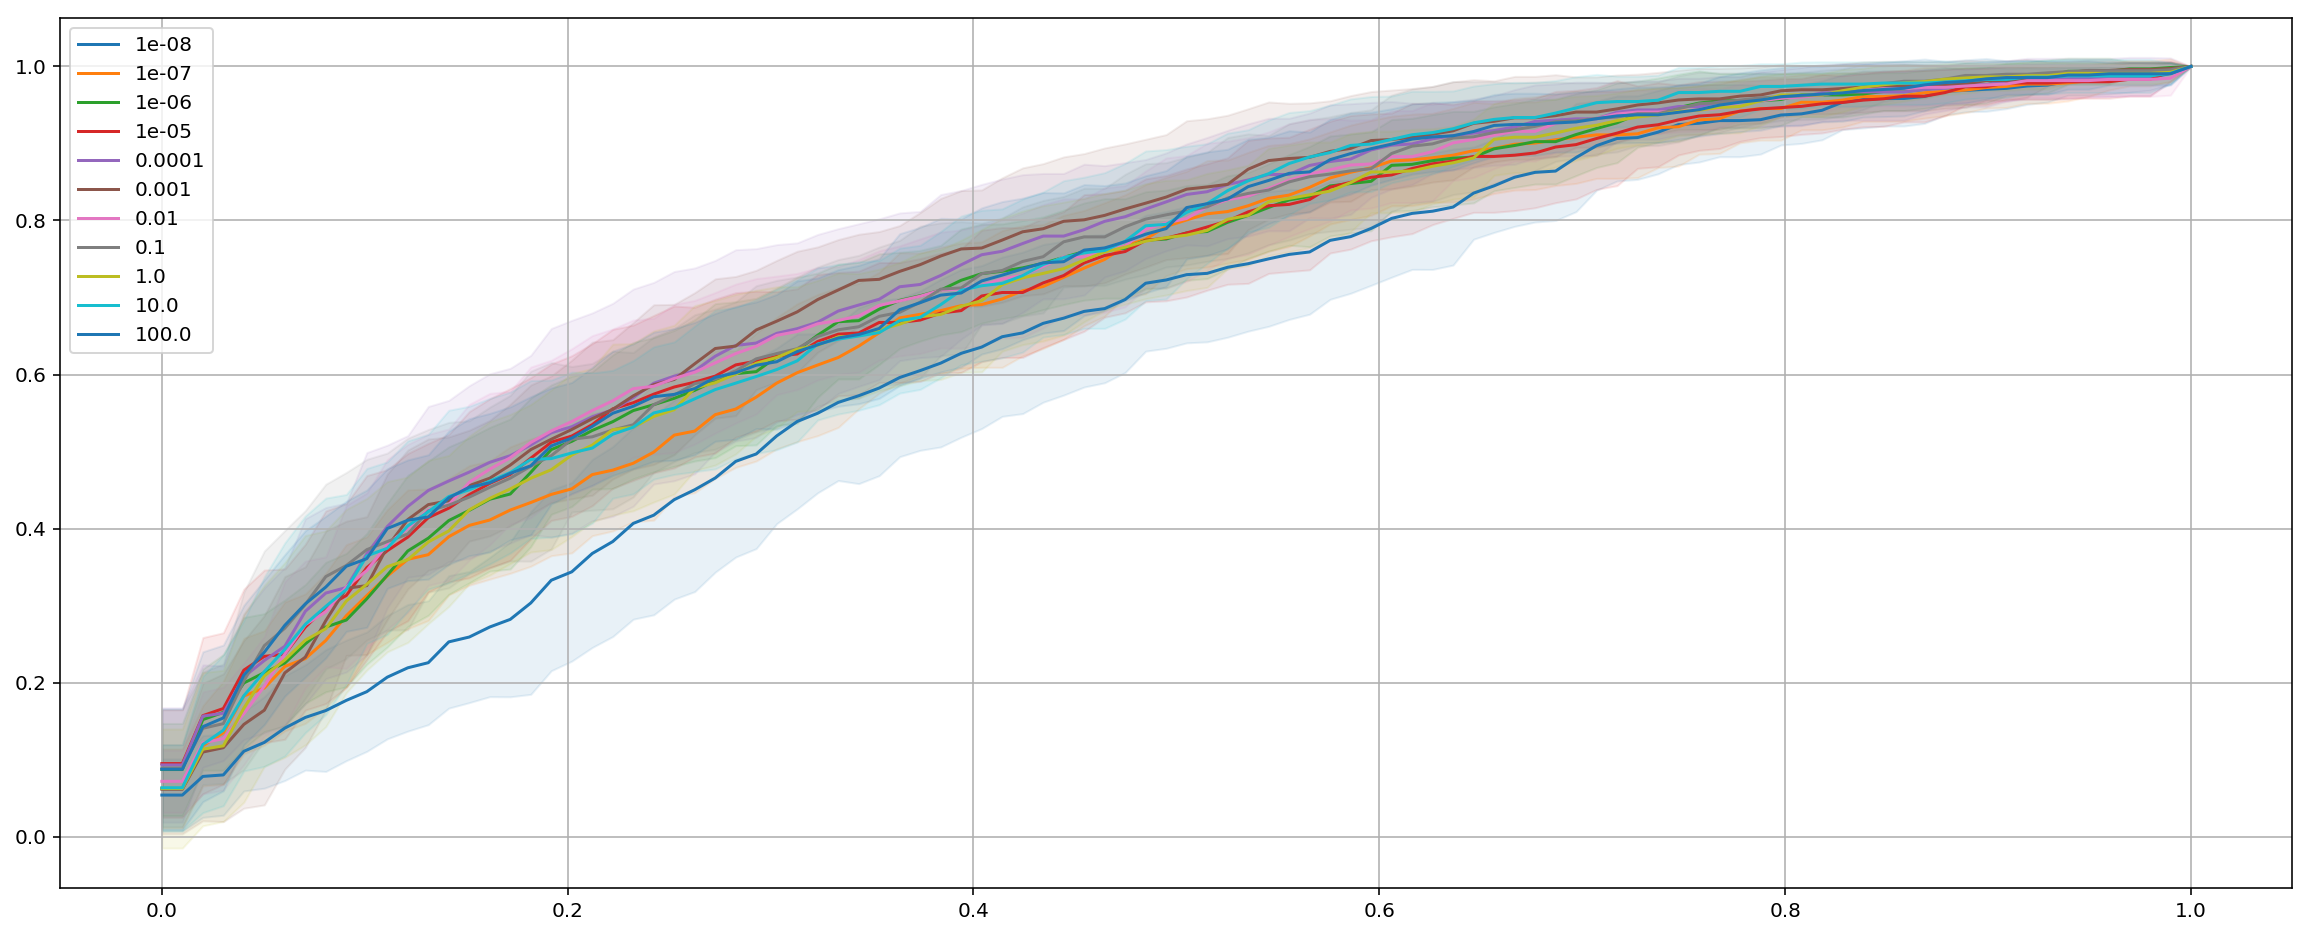

In [120]:
plt.figure(figsize=(20,8))
cs = 10.**np.arange(-8, 3)
for c in cs:
    process = [
        ('poly_transform', sk.preprocessing.PolynomialFeatures(2)),
        ('logistic', LogisticRegression(C=c))
    ]
    mxs, mys, stdys = random_cv(process, 50)
    l = plt.plot(mxs, mys, label=c)
    plt.fill_between(mxs, mys-stdys, mys+stdys, alpha=0.1, color=l[0].get_color())
plt.legend()
plt.grid()

### But in the end we need to select one line base on one number

There is a builtin for this.

In [132]:
from sklearn.model_selection import cross_val_score

reg_poly_pipeline = sk.pipeline.Pipeline([
    ('poly_transform', sk.preprocessing.PolynomialFeatures(2)),
    ('logistic', LogisticRegression(C=1e-5))
])
scores = cross_val_score(reg_poly_pipeline, df[feature_cols], df[class_col], 
                cv=sklearn.model_selection.ShuffleSplit(n_splits=100, test_size=0.2), 
                scoring='roc_auc')


In [133]:
print(np.mean(scores), np.std(scores))

0.7445704262095064 0.04746225064562747


In [143]:
cs = np.arange(-8, 3)
all_scores = []
for c in cs:
    process = [
        ('poly_transform', sk.preprocessing.PolynomialFeatures(2)),
        ('logistic', LogisticRegression(C=10.**c))
    ]
    cl = sk.pipeline.Pipeline(process)
    scores = cross_val_score(cl, df[feature_cols], df[class_col], 
                cv=sklearn.model_selection.ShuffleSplit(n_splits=100, test_size=0.2), 
                scoring='roc_auc')
    all_scores.append((c, np.mean(scores), np.std(scores)))

<ErrorbarContainer object of 3 artists>

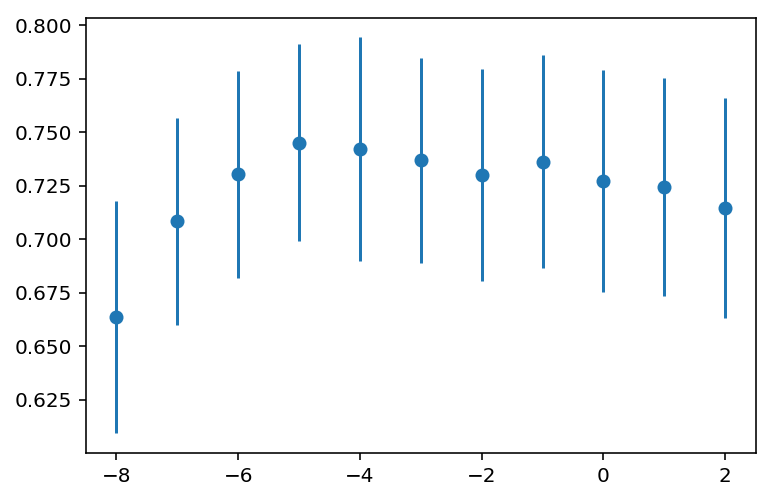

In [151]:
all_scores = np.array(all_scores)
cs = all_scores[:, 0]
means = all_scores[:, 1]
stds = all_scores[:, 2]
plt.errorbar(cs, means, stds, linestyle='', marker='o')

In [154]:
#The winner
print(max(all_scores, key=lambda x: x[1]))

[-5.          0.74494534  0.04595197]


# Important Note

Even though in this example we use AUC-ROC (Area under the curve for ROC) as the metric to perform model. In practice, the metric you should use depends on your application ex: total money, total burden to society etc. Think before you compare don't use the popular ones blindly.

https://scikit-learn.org/stable/modules/model_evaluation.html

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

## Bonus: you can save your model/pipeline

Now we know the best parameter set to use. We can then use it even with the whole data and report performance from our cv.

In [156]:
best_pipeline = sklearn.pipeline.Pipeline([
        ('poly_transform', sk.preprocessing.PolynomialFeatures(2)),
        ('logistic', LogisticRegression(C=10.**-5))
    ])

In [157]:
best_pipeline.fit(df[feature_cols], df[class_col])

Pipeline(memory=None,
     steps=[('poly_transform', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('logistic', LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [159]:
best_pipeline.score(df[feature_cols], df[class_col])

0.7575757575757576

In [160]:
import pickle as pck

In [164]:
with open('best_pipeline.pck', 'wb') as f:
    pck.dump(best_pipeline, f)

In [167]:
best_cl = None
with open('best_pipeline.pck', 'rb') as f:
    best_cl = pck.load(f)

In [168]:
best_pipeline.score(df[feature_cols], df[class_col])

0.7575757575757576

# Exercise

Find the best model for predicting diabetes(Use `roc_auc` for score).

The data is in `diabetes.csv`

https://www.kaggle.com/uciml/pima-indians-diabetes-database/version/1